In [23]:
import numpy as np
import pandas as pd
import datetime as dt
#-Import custom import methods for the csv files-#
from Functions import (  import_csv_BondList,
                        import_csv_BondTimeSeries)
import matplotlib.pyplot as plt

## Bond List

In [24]:
BondListC = import_csv_BondList('DataFrames/BondList.csv')
BondListC['First Issue Date'].head();
mask = (BondListC['First Issue Date'] > dt.datetime(1862,1,1)) & (BondListC['First Issue Date'] < dt.datetime(1872,1,1))

In [25]:
BondListC.loc[mask, :];

The 5-20s bonds were U.S. Treasury bonds that were issued to help finance the Union war effort during the Civil War. The name “5-20s” came from the bond’s nature of maturity; that of a 20 year maturity period that could be redeemed after the span of 5 years. The 5-20s paid a 6 percent coupon, and was authorized for a total amount of 500 million dollars. Congress was able to come towards an agreement to pay coupons in specie, but left the conversationb surrounding the redemption of the par value "ambiguous" to be decided on a later date. However, it was advertised by the Secretary of Treasury, Salmon P. Chase, to be redeemed with specie as opposed to lawful money (greenbacks) which traded substantially lower.


The reason for issuing the 5-20s bonds was that the Union government was to provide an enormous capital fitting the needs arising from the expenses of the Civil War which includes supplies, equipment, salaries of soldiers, amongst others, that were related to military use. The Government, by such an offer, expected to receive investment from internal, as well as foreign, investors in order to ensure a constant flow of money and hence share the burden of expenses of the war.

## Bond Quantity

In [26]:
BondQuantC = import_csv_BondTimeSeries('DataFrames/BondQuant.csv')
BondQuantC.head();

In [27]:
five_twenties = (20101, 'Total Outstanding')
full_period = (BondQuantC.index>dt.datetime(1862,12,1)) & (BondQuantC.index<dt.datetime(1878,12,1))
df_5_20_full = BondQuantC.loc[full_period, five_twenties].ffill() / 1e6

In [28]:
df_5_20_full.head();

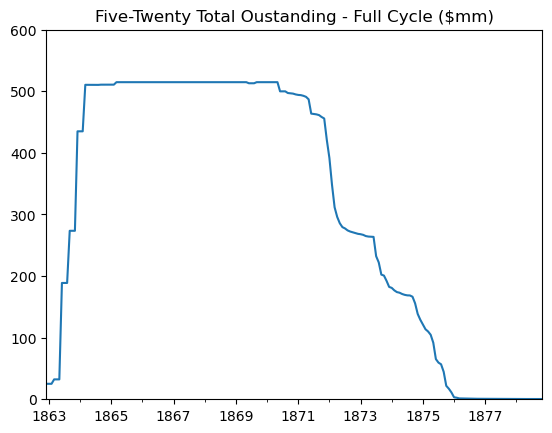

In [29]:
df_5_20_full.plot(title = 'Five-Twenty Total Oustanding - Full Cycle ($mm)', ylim=[0, 600]);
#plt.ylim(0, 600)

Although bond sales initially started slow, it quickly picked up pace when Jay Cooke was given exclusive access to broker the bonds. Jay created a nationwide advertising infrastructure 

In [30]:
issue_period = (BondQuantC.index>dt.datetime(1862,12,1)) & (BondQuantC.index<dt.datetime(1865,12,1))
df_5_20_issue = BondQuantC.loc[issue_period, five_twenties] / 1e6

In [31]:
issues = df_5_20_issue.dropna()
big = issues.diff()>10
big[dt.date(1862, 12, 31)] = True
big_issues = issues[big]

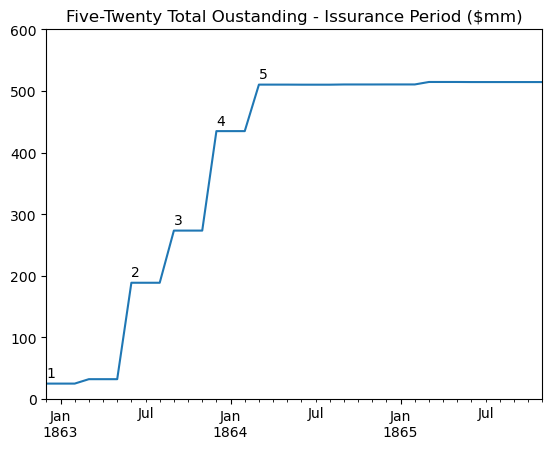

In [32]:
ax = df_5_20_issue.ffill().plot(title = 'Five-Twenty Total Oustanding - Issurance Period ($mm)', ylim=[0, 600]);
for i in range(big_issues.shape[0]):
    ax.annotate(i+1, (big_issues.index[i], big_issues[big_issues.index[i]]+10))

1.The 5-20s bonds were authorized for an amount of 500 million dollars in February 1862 but by late September only 2.5 million dollars worth were sold. When the 5-20s bonds were first issued, they were brokered by the government and “auctioned” to bankers. The 5-20s initially struggled to sell due to the size of the debt and the banks demand for higher interest rates than what the government was willing to offer. The data starts from 1863, and is a continuation of the slow trend of bond sales that started when the bond was first issued.
2.Jay Cooke, a prominent lobbyist and banker was able to increase bond sales by acting as a broker. With 2,500 salesmen and his brother’s media connections, he marketed the debt to the public using patriotic appeals. His success is shown on the graph by the drastic increase in sales starting in the middle of 1863.
3.The marked jump in prices in 1863 was also in response to the newly enacted National Banking Act of 1863. The National Banking Act required National Banks to issue notes backed by federal and not state bonds. This created enormous demand for the 5-20s bonds. 
    a. Starting on July 1st 1863, legal tender notes could no longer be converted into 5-20s. It was during that same time period when   newspapers around the country, but predominantly the ones owned and influenced by the Cooker brothers, began to frame buying the 5-20s as the “last chance” to cash in on such a deal.
    b. Also important to note- around this time the Battle of Gettysburg happened which was a turning point in the war in favor of a Union victory- so the sudden increase in demand for bonds can be the result of a variety of factors.
4. There were a succession of Union victories from September of 1863 until the year's end.
    #Side note: It would be interesting to see how this decision impacted the exchange rate between gold and greenbacks...
5. In June 3rd 1864 the National Banking Act was signed with revisions from the earlier Act of 1863. The difference was a result of pressure from elite bankers Jay Cooke who enticed New York City banks which held a lion's share of the country's capital, into complying with the act (increasing demand for the 5-20s substantially).

## some important notes to consider

1. Pulling the strings behind the issuance and brokerage of the 5-20s bonds was Jay Cooke. The success of the 5-20s in raising war-time money is often credited to Salmon P. Chase, however it was Cooke who through intensive lobbying, put Chase in office, and later on Senator Sherman, both who were instrumental in not only creating the 5-20s bonds, but also in passing key bills that facilitated the sale of the bond. There is a general impression among academic papers that Cooke was the mastermind who put political figures into office so that he could profit off the commission of sales (1.6 million).
2. In a letter to a prospective investor, Jay writes "Congress has provided that the Bonds shall be PAID in Gold when due". The 5-20s were advertised to be redeemed for its par value in gold.

In [33]:
active_mask = BondQuantC.columns.get_level_values('Series') == "Active Outstanding"

In [34]:
outstanding = BondQuantC.loc[:, active_mask]

In [35]:
agg = outstanding.sum(axis=1)

## Bond Price

In [36]:
BondPriceC = import_csv_BondTimeSeries('DataFrames/BondPrice.csv')
#BondPriceC.head()

In [37]:
five_twenties_price = BondPriceC.loc[(BondPriceC.index>dt.datetime(1862,12,1)) & (BondPriceC.index<dt.datetime(1878,12,1)), (20101, 'Average')]

In [38]:
prices = BondPriceC.mean(axis=1)

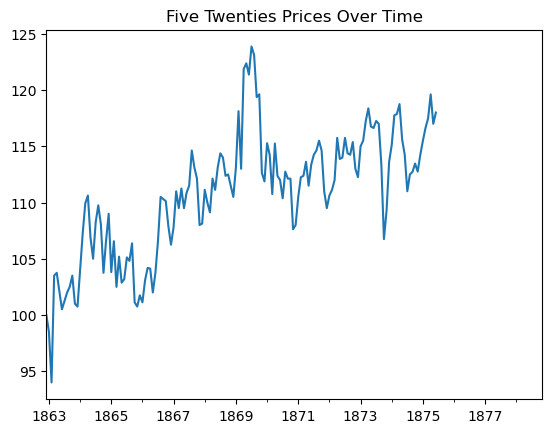

In [39]:
five_twenties_price.plot(title='Five Twenties Prices Over Time');

In [40]:
five_twenties_price2 = BondPriceC.loc[issue_period, (20101, 'Average')]

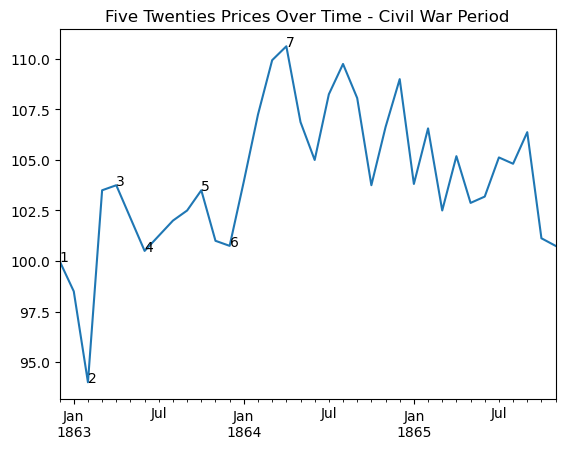

In [46]:
ax2 = five_twenties_price2.plot(title='Five Twenties Prices Over Time - Civil War Period');
# mask_big_moves = five_twenties_price2.diff().abs() > 3
# big_moves = five_twenties_price2[mask_big_moves]
x = [
    dt.datetime(1862, 12, 31), 
    dt.datetime(1863, 2, 28), 
    dt.datetime(1863, 4, 30), 
    dt.datetime(1863, 6, 30), 
    dt.datetime(1863, 10, 31), 
    dt.datetime(1863, 12, 31), 
    dt.datetime(1864, 4, 30)]

for i, d in enumerate(x):
    ax2.annotate(i+1, (d, five_twenties_price2[d]))

1. Consistent with the graph of bond quantities over time, poor sales due to disharmoney between government and market demands resulted in low sales for 5-20s consequently resulting in a dip in prices
2. On January 8 1863 it was made public that congress had increased the supply of Greenbacks by $300 million. This increase in greenback supply would likely lead to inflation, reducing the value of greenbacks relative to specie. Since 5-20 bonds could be bought in greenbacks, and was advertised to be redeemable in specie, their relative value would increase as the value of greenbacks decreased. The news also altered public perceptions of the Union financial situation. It signaled that previous fiscal measures were insufficient in covering Union expenses, and the war would be more expensive than anticipated. Because of the promise of payments in specie, the 5-20 bonds became more attractive. Investors seeking to protect themselves from inflation would prefer bonds that guaranteed returns in a more stable currency rather than the increasingly devalued greenbacks.  
3.  In March of 1863, public confidence was at an all time low, and gold was increasing rapidly in “price”, and 5-20s were trading at 94 ½ of its par value. In response Jay Cooke bought every bond selling below par value to boost the government credit. As a result bond sales increased dramatically to a million a day. This increase in demand was so tremendous that “the great difficulty was to obtain enough bonds from the Treasury Department, which in turn was unable to get deliveries from the printers and engravers”. These two events jointly contributed to the rising prices from 2. to 3.
5. This could be quite the far shot, but in April 27, 1863 the Confederate Treasury Note Act was passed, which- The Confederate Congress authorized the issuance of interest-bearing Treasury notes, known as "Six Per Cent Non-Taxable Bonds." This coupled with a series of Union defeats in April such as the Battle of Plymouth but also tumultous political developments in the Union like the Proclamation of Amnesty and Reconstruction that caused unrest could have resulted in investors questioning the future of the Union / prefering Southern bonds and thus outcompeting the 5-20s in attracting investors.
6. Consistent with the graph of quantity over time, the growth in prices is the result of the adoption of the National Banking Act by New York Bankers. This solidified the Act, and consequently invetor's confidence that there would be consistent demand for these bonds from banks.
7. On June 20th the government ordered the Gold Room to close. The lack of an organized market made the prices of greenbacks more volatile and consequently caused 5-20s prices to plummet as it lost its purpose as a means of currency exchange.
8. On June 30th Chase resigned as treasury Secretary and was replaced by William P Fessenden on July 1. Fesseden was much more willing to accept advice from bankers than Chase. It is known that Fessenden had a meeting with New York financial leaders, prior to the changes in prices in July of 1864.



## Some observations

Interestingly, bond prices seem to be more sensitive towards developments in government actions or in the finance industry as opposed to developments in the war (at least for the first two years). From my limited background of Civil War history, I would assume this is the consequence of overconfidence/ excessive optimism as both sides were confident of a quick victory in the early years of the war, which meant public perception was fixed.

However there are still some incongruencies to this observation. A bondholder interviewed by a newspaper in 1863 commented “If I fight hard enough my bonds will be good”. This embodies the theory that the outcomes in the war determines confidence in bonds and is contradictory to the data/my observation, which leads me to hypothesize;

Jay Cooke advertised the bonds to both the public and banks, but it would be nice to see data as to how much bonds were owned by the public vs banks. That's because Banks and ordinary civilian investors may buy/hold/sell their bonds differently. I would assume the public is more susceptible to influences of news of the war, and this can be determined if we had data that can show the differences in liquidity between the two different types of investors. But if there were to be a difference, the explanation to this phenomenonc could be that  banks held most of the market share of 5-20s which could explain why bond prices aren't sensitive to war developments. 

One of the biggest incongruencies on the graph that we are still investigating, is Early’s failed raid on the White house. Jubal Early’s army reached within five miles of the White House by July 11th. This created an uproar among Union states, the Washington Evening Star on July 10th wrote “The excitement in this city is intense and on the increase. Crowds are thronging the bulletin boards, and a thousand wild and improbable rumors are in circulation”. We know that this news struck deep within the financial community, because this resulted in the largest shift of the entire war for Greenbacks, a change of 4.8 percent which dwarfed the next largest 2.6 percent.


## Redemption

Redemption of 5-20s bonds began as early as 1867, a mere five years after the issuance. Tthe U.S. government was able to redeem the bonds through surplus revenues and was part of the general stabilizing process regarding the national economy and the transition of the country's economy from financing the war to peacetime economic policies. Starting from 1875 the government retired most of the 5-20s bonds, refinancing them with 4.5 percent, 30 year bonds, and 4 percent, 5 year bonds and by 1877 all the 5-20s were redeemed.


## How did fiscal discrimination of the 520 bonds influence how the public viewed the two “sides” of the Civil War? And what about the status of the economy as a whole?

The 5-20 bonds, when issued, was ambigious as to whether it would be redeemed in greenbacks or specie. As a result, following the war, a strong debate arose regarding whether these bonds needed to be paid back in more valued gold. This question of payment caused huge anxiety among the general public and various opinions related to the long-term effects of the Civil War came up. The middle-class veterans who were holders of these bonds and who anticipated their returns in greenbacks felt overwhelmed when suddenly an overriding effort was realized to pay the military pensions in gold. This notion was strongly based upon beliefs that financial leaders used this situation as a pawn to boost their personal bankrolls at the expense of the common bondholder.

The congressional debate paralleled discussions surrounding the redemption of revolutionary war bonds. Republicans supported redemption in specie, arguing its benefits for bolstering government which made debt refinancing more affordable amidst lower interest rates. Conversely, Democrats advocated for redemption in greenbacks, emphasizing immediate savings on government expenditures.

The differential yield between greenbacks and gold paying interest was one that had been brought to the limelight first and foremost, as the gold paying interest paid a higher return due to the face value of gold being greater than the greenbacks. As this continued, the complexity of the dollar loss increased over time for bondholders, especially greenbacks, exposing them to more fluctuations in interest rates. Moreover, to those who favored the Confederacy, financial policy had come to symbolize an economic exploitation by the North. The demand for gold-only payments simply deepened their unfavorable opinion of the Union's motives and its actions during and following the war. To the supporters of the Confederacy, in fact, the financial approach by the Union was nothing but currency trading between gold and greenback values by Northern financiers.


Dispute over how to redeem the greenbacks made the economy unstable, for it gave holders of these greenbacks a probability that their value investors would be devalued. As a result, consumer confidence and spending were reduced. The greenback printing in the course of the war added to inflationary pressures and virtually waged war on purchasing power and economic stability. The vaguely defined character of the bond redemption terms increased the effective sovereign risk and further depressed overall market confidence in US government debt. Moreover, fiscal discrimination caused a lot of damage to the public's confidence in the government management of finances and generated skepticism about future economic policies.


## How Did the 5-20 Bonds Influence Post-War Reconstruction and Economic Recovery?

The huge issuance of 5-20 bonds added much to the national burden of debt. At the time, a high debt-to-GDP ratio depicted a heavy fiscally burdened economy. This attributed to the credit spread for US government bonds vis-à-vis other sovereign debts would have portrayed the perceived creditworthiness and risks associated with the US during reconstruction.

A major share of the funds from the 5-20 bonds was instrumental in funding the reconstruction projects in the war-ravaged South, in particular. These were imperative in restoring facilities and getting economic activities going. The bonds made available the required capital for various strategically important infrastructure-based projects, thus giving impetus to economic growth and employment.

Plans the government had in place to redeem and refinance the 5-20 bonds kept the national debt in check. The graphs trace the different outstanding bonds from over $500 million in 1865 to almost nothing in 1877. Furthermore, effective redemption combined with strategic issuance reduced refinancing risk and played a big part in stabilizing the economy. Eventually, what did restore confidence among both domestic and international investors toward further investment to drive economic growth was the repayment of bonds in gold. The reduction in risk premium for U.S. government bonds showed improvement in investor confidence and the perceived stability in the U.S. financial system.The gradual reduction of outstanding bonds and the stabilization of the price for bonds suggested that the government got things quite right in the sphere of economic stabilization and fiscal discipline. The decision for repayment in gold was an incidental, but quite crucial, factor of monetary policy in influencing inflation expectations and thus currency stability.


Newman, P. (2018). "The Origins of the National Banking System: The Chase-Cooke Connection and the New York City Banks." The Independent Review, 22(3), 383-401. Published by Independent Institute. Retrieved from JSTOR.

Rothbard, M. N. (2002). History of Money and Banking in the United States: The Colonial Era to World War II. Ludwig von Mises Institute. Retrieved from Mises Institute.

Wikipedia contributors. "Economic history of the American Civil War." Wikipedia, The Free Encyclopedia, 2024. Available at Wikipedia.

Abernathy, C., et al. (2018). "Reconstruction." The American Yawp, Stanford University Press. Available at The American Yawp.

Abernathy, C., et al. (2018). "The Civil War." The American Yawp, Stanford University Press. Available at The American Yawp.

Bayley, R. (1869). "The National Debt of the United States." Economic Journal, 29(2), 220-240. Retrieved from your Dropbox.

Foner, E. 1988. Reconstruction: America's Unfinished Revolution, 1863–1877. New York: HarperCollins Publishers.

Blight, D. 2001. Race and Reunion: The Civil War in American Memory. Cambridge, MA: Harvard University Press.

Higgs, R. 1987. "Crisis and Leviathan: Critical Episodes in the Growth of American Government." New York: Oxford University Press.

McPherson, J. M. 1988. Battle Cry of Freedom: The Civil War Era. New York: Oxford University Press.

Ransom, R. L. (1989). Conflict and Compromise: The Political Economy of Slavery, Emancipation, and the American Civil War. Cambridge University Press.

Richardson, H. C. (2001). The Death of Reconstruction: Race, Labor, and Politics in the Post–Civil War North, 1865–1901. Harvard University Press.

Studenski, P., & Krooss, H. E. (1952). Financial History of the United States. McGraw-Hill Book Company, Inc.

Mitchell, B. R. (1962). Abstract of British Historical Statistics, Cambridge University Press. (For comparative analysis of post-war economies.)


In [105]:
##five_twenties_price2

##x = [dt.date(1862, 12, 31), dt.date(1863, 2, 28)]


In [106]:
##five_twenties_price2[dt.datetime(1862, 12, 31)]

In [108]:
##ive_twenties_price2.index